In [1]:
#install.packages('ggplot2')
#install.packages('class')
#install.packages('gmodels')
library(ggplot2)
library(class)
library(gmodels)

#### Load Data
Source: http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

In [2]:
wine <- read.csv('data/winequality-white.csv', sep=';')

#### Explore data 
Check for missing values
Check for correlation between variables

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.300   1st Qu.:0.2100   1st Qu.:0.2700   1st Qu.: 1.700  
 Median : 6.800   Median :0.2600   Median :0.3200   Median : 5.200  
 Mean   : 6.855   Mean   :0.2782   Mean   :0.3342   Mean   : 6.391  
 3rd Qu.: 7.300   3rd Qu.:0.3200   3rd Qu.:0.3900   3rd Qu.: 9.900  
 Max.   :14.200   Max.   :1.1000   Max.   :1.6600   Max.   :65.800  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.00900   Min.   :  2.00      Min.   :  9.0        Min.   :0.9871  
 1st Qu.:0.03600   1st Qu.: 23.00      1st Qu.:108.0        1st Qu.:0.9917  
 Median :0.04300   Median : 34.00      Median :134.0        Median :0.9937  
 Mean   :0.04577   Mean   : 35.31      Mean   :138.4        Mean   :0.9940  
 3rd Qu.:0.05000   3rd Qu.: 46.00      3rd Qu.:167.0        3rd Qu.:0.9961  
 Max.   :0.34600   Max.   :289.00      Max.   :440.0   

'data.frame':	4898 obs. of  12 variables:
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  20.7 1.6 6.9 8.5 8.5 6.9 7 20.7 1.6 1.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ free.sulfur.dioxide : num  45 14 30 47 47 30 30 45 14 28 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ density             : num  1.001 0.994 0.995 0.996 0.996 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : int  6 6 6 6 6 6 6 6 6 6 ...


[1] 0

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
fixed.acidity,1.00000000,-0.02269729,0.28918070,0.08902070,0.02308564,-0.0493958591,0.091069756,0.26533101,-0.4258582910,-0.01714299,-0.12088112
volatile.acidity,-0.02269729,1.00000000,-0.14947181,0.06428606,0.07051157,-0.0970119393,0.089260504,0.02711385,-0.0319153683,-0.03572815,0.06771794
citric.acid,0.28918070,-0.14947181,1.00000000,0.09421162,0.11436445,0.0940772210,0.121130798,0.14950257,-0.1637482114,0.06233094,-0.07572873
residual.sugar,0.08902070,0.06428606,0.09421162,1.00000000,0.08868454,0.2990983537,0.401439311,0.83896645,-0.1941334540,-0.02666437,-0.45063122
chlorides,0.02308564,0.07051157,0.11436445,0.08868454,1.00000000,0.1013923521,0.198910300,0.25721132,-0.0904394560,0.01676288,-0.36018871
free.sulfur.dioxide,-0.04939586,-0.09701194,0.09407722,0.29909835,0.10139235,1.0000000000,0.615500965,0.29421041,-0.0006177961,0.05921725,-0.25010394
total.sulfur.dioxide,0.09106976,0.08926050,0.12113080,0.40143931,0.19891030,0.6155009650,1.000000000,0.52988132,0.0023209718,0.13456237,-0.44889210
density,0.26533101,0.02711385,0.14950257,0.83896645,0.25721132,0.2942104109,0.529881324,1.00000000,-0.0935914935,0.07449315,-0.78013762
pH,-0.42585829,-0.03191537,-0.16374821,-0.19413345,-0.09043946,-0.0006177961,0.002320972,-0.09359149,1.0000000000,0.15595150,0.12143210
sulphates,-0.01714299,-0.03572815,0.06233094,-0.02666437,0.01676288,0.0592172458,0.134562367,0.07449315,0.1559514973,1.00000000,-0.01743277


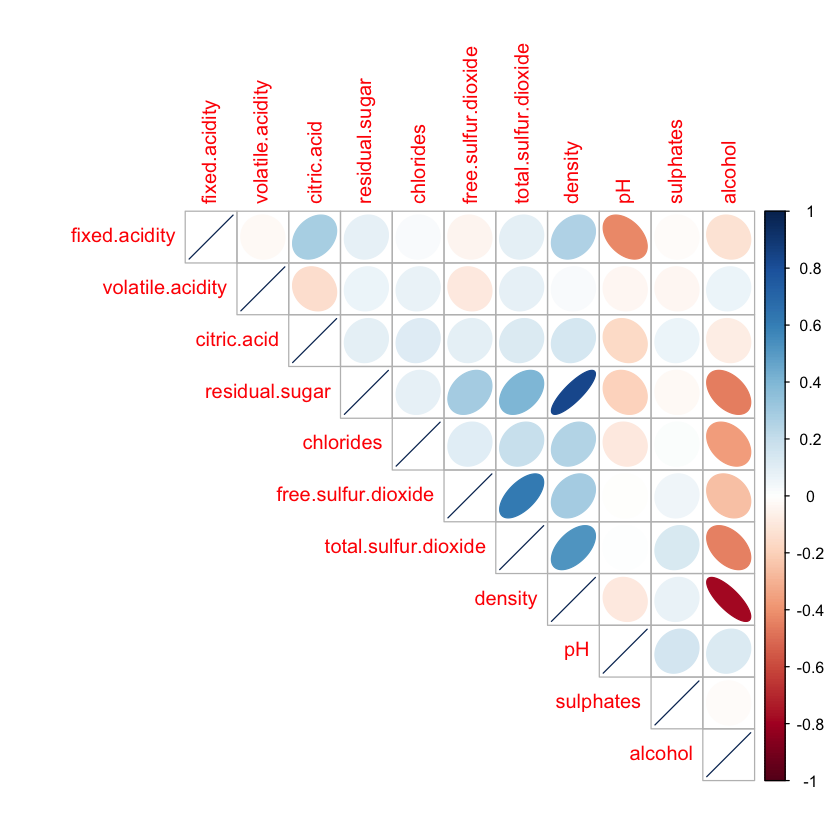

In [3]:
summary(wine)
str(wine)
sum(is.na(wine))

# correlation    ################
c<-cor(wine[,-12])
c
corrplot::corrplot(c, method = 'ellipse', type ='upper')

All variables are numeric with no missing vallues in data set.

Density ~ Alcohol : Strong Negative Correlation = -0.78
Density ~ Residual Sugars : Strong Positive Correlation = 0.84
Total.Sulfur.dioxide~ Free.sulfur dioxide: Moderate positive correlation - 0.61

#### Frequency distribution
The quality of wine has a normal distribution.



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


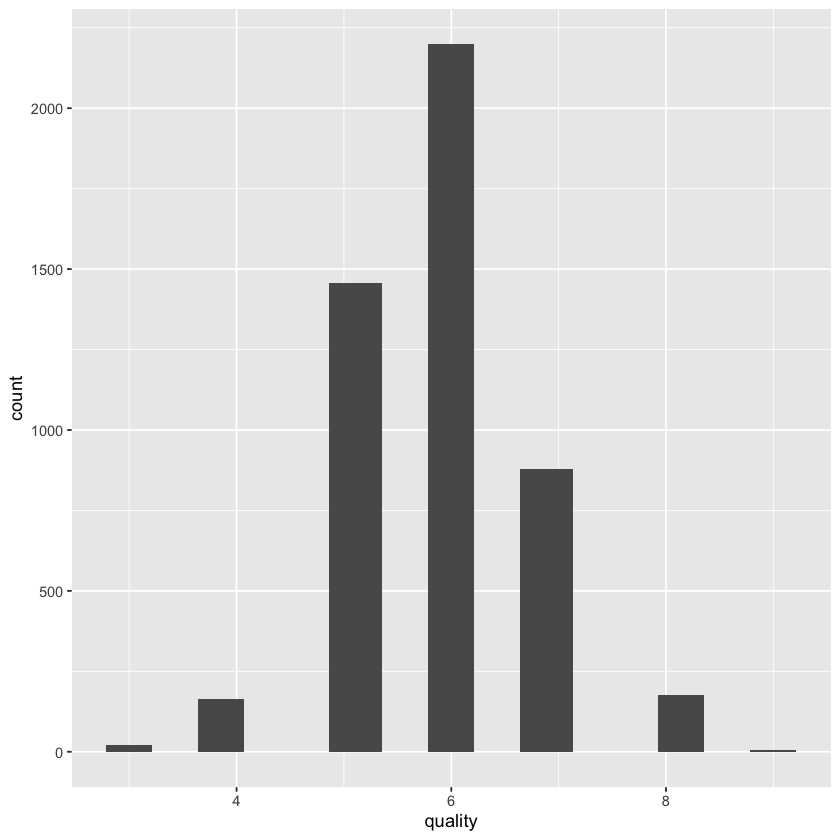

In [4]:
ggplot(wine, aes(x=quality))+geom_histogram() + stat_bin(bins=15)


#### Convert the numeric target variable to factor with 3 levels
0-4 : Low

5-7 : Medium

8-10 : High


In [5]:
q_label<-cut(wine$quality, breaks =c(0,4,7,10),labels =  c('Low','Medium','High'))
wine['quality_label']<-q_label

#### Normalize values

In [6]:
normalize <- function(x) {
               return ((x - min(x)) / (max(x) - min(x))) }

#Normalizing only numerical columns 1:11
wine_normal<- as.data.frame(lapply(wine[1:11], normalize))

wine_normal <- cbind(wine$quality_label,wine$quality,wine_normal)

#### Divide the dataset
- I have taken 70:30 ratio to divide the data set
- 3428 instances for training set 
- 1470 instances for the test set
- I used Simple Random Sampling but other methods can be used as per your choice

In [7]:
x<- sample(1:nrow(wine_normal),0.7*nrow(wine_normal))
train_wine <- wine_normal[x,]
train_label<- train_wine[,1:2]
train_wine<- train_wine[,3:13]

test_wine<- wine_normal[-x,]
test_label<- test_wine[,1:2]
test_wine<- test_wine[,3:13]

#### Create an efficient Prediction Model
I used KNN iteratively to obtain the best model by changing K. Factors such as Accuracy, Sensitivity, Specificity etc. can be considered to reach to an efficient model. 
For simplicity, I have used Accuracy. 

In [8]:
# Finding optimum K for an efficient predictive model...
res<-data.frame()
for (i in 5:25)
{
  wine_pred <- knn(train = train_wine, test = test_wine, cl=train_label[,1],k=i)
  confusion_matrix <- table(test_label[,1], wine_pred)
  acc=sum(diag(confusion_matrix))/sum(confusion_matrix)
  res<-rbind(res,c(i,acc))
}
names(res)<-c('k','accuracy')
final_k <- res[which.max(res$accuracy),"k"]

#FINAL MODEL
wine_pred<- knn(train = train_wine, test = test_wine, cl=train_label[,1],k=final_k)
ct<-CrossTable(x=test_label[,1], y=wine_pred, prop.chisq=FALSE)
ct


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1470 

 
                | wine_pred 
test_label[, 1] |    Medium | Row Total | 
----------------|-----------|-----------|
            Low |        59 |        59 | 
                |     0.040 |           | 
----------------|-----------|-----------|
         Medium |      1357 |      1357 | 
                |     0.923 |           | 
----------------|-----------|-----------|
           High |        54 |        54 | 
                |     0.037 |           | 
----------------|-----------|-----------|
   Column Total |      1470 |      1470 | 
----------------|-----------|-----------|

 


$t
        y
x        Medium
  Low        59
  Medium   1357
  High       54

$prop.row
        y
x        Medium
  Low         1
  Medium      1
  High        1

$prop.col
        y
x            Medium
  Low    0.04013605
  Medium 0.92312925
  High   0.03673469

$prop.tbl
        y
x            Medium
  Low    0.04013605
  Medium 0.92312925
  High   0.03673469


In [9]:
t<- table(test_label[,1], wine_pred)

#Number of instances
n<- sum(t)

# True Positives list
tp <- diag(t)

#Instances per class
rowsum <- apply(t, 1, sum)

#Predictions per class
colsum <- apply(t,2,sum)

acc<-sum(tp)/sum(t)

#precision <- round(tp/colsum,3)
#recall <- round(tp/rowsum,3)
paste('Model Accuracy =',round(acc*100,2),'%')
#paste('Precision and Recall=>')
#cbind(precision,recall)

[1] "Model Accuracy = 92.31 %"

#### Conclusion
The model has a good accuracy but it is not the best model because most of the results overfit 'Medium' wine quality.

This is because of the class imbalance in quality. To build a better model, the class imbalance should be corrected using any other the techniques such as SMOTE. 

I will update this file very soon.
